<a href="https://colab.research.google.com/github/Selectallfrom/AB-test/blob/main/%D0%90_%D0%92_%D1%82%D0%B5%D1%81%D1%82%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D0%BC%D0%BE%D0%B1%D0%B8%D0%BB%D1%8C%D0%BD%D0%BE%D0%B3%D0%BE_%D0%BF%D1%80%D0%B8%D0%BB%D0%BE%D0%B6%D0%B5%D0%BD%D0%B8%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Задание 10. A/B тестирование.

Кейс: a/b-тест для мобильного приложения.

Имеется мобильное приложение для магазина по продаже продуктов питания. Выдвинута гипотеза о том, что смена шрифтов улучшит качество обслуживания по количеству клиентов, совершающих каждое событие. Для проверки этой гипотезы принято решение провести A/B-тест.   

Договорились принять решение по результатам A/B-теста.
Пользователей разбили на 2 группы: 247 -- контрольная группа со старыми шрифтами ; 248 -- экспериментальная с новыми шрифтами.

Описание данных

|Признак|Комментарий|
|--:|:--|
|`EventName`|название события|
|`DeviceIDHash`|уникальный идентификатор пользователя|
|`EventTimestamp`|время события|
|`ExpId`|номер группы|

Инструкция по выполнению проекта

Шаг 1. Загрузите данные
- Знакомство с данными;
- Корректность a/b-теста.

Шаг 2. Подготовьте данные
- Корректировка заголовков;
- Типы данных;
- Аномали и пропуски.

Шаг 3. EDA
- Cколько всего событий?
- Сколько всего пользователей в логе?
- Сколько в среднем событий приходится на пользователя?
- Период теста: максимальная и минимальная даты; гистограмма по дате и количеству событий.

Шаг 4. Анализ воронки событий
- Распределение событий: какие события и в каком количестве.
- Сколько пользователей совершали каждое из этих событий?
- Постройте воронку событий: какая доля пользователей проходит на следующий шаг воронки. На каком шаге теряете больше всего пользователей?
Какая доля пользователей доходит от первого события до оплаты?

Шаг 5. Анализ результатов эксперимента
- Сколько пользователей в каждой группе?
- Посчитайте долю пользователей, совершивших каждое из событий.
- Проверьте гипотезу о наличие значимых отличий по результатам теста.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

In [ ]:
# Знакомство с данными/Чтение данных
df = pd.read_csv('/content/Материалы+для+выполнения+домашнего+задания+10+(ab_test_home).csv')
df

,EventName,DeviceIDHash,EventTimestamp,ExpId
0,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
1,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
2,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
3,CartScreenAppear,6217807653094995999,2019-07-25 11:48:43,248
4,MainScreenAppear,1850981295691852772,2019-07-25 20:31:42,247
...,...,...,...,...
163817,MainScreenAppear,2300292234025330845,2019-08-07 21:05:57,247
163818,MainScreenAppear,5317814261427487562,2019-08-07 21:09:22,248
163819,OffersScreenAppear,5317814261427487562,2019-08-07 21:09:27,248
163820,OffersScreenAppear,5317814261427487562,2019-08-07 21:10:08,248


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163822 entries, 0 to 163821
Data columns (total 4 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   EventName       163822 non-null  object
 1   DeviceIDHash    163822 non-null  int64 
 2   EventTimestamp  163822 non-null  object
 3   ExpId           163822 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 5.0+ MB


Пропусков нет

In [ ]:
# Корректность a/b-теста.
# 1. Количество пользователей в группах примерно одинаковое
df.groupby('ExpId').DeviceIDHash.nunique()

ExpId
247    2520
248    2542
Name: DeviceIDHash, dtype: int64

Количество уникальных пользователей в гр.247 и гр.248 равно 2520 и 2542 соответственно, т.е. примерно одинаковое

In [ ]:
# 2. Одни и те же пользователи не состоят в разных группах
A = set(df[df.ExpId == 247].DeviceIDHash)
B = set(df[df.ExpId == 248].DeviceIDHash)
len(A.intersection(B))
#len(B.intersection(A))

0

Количество пользователей, которые одновременно состоят в гр.247 и гр.248 равно нулю

Шаг 2. Подготовьте данные

Корректировка заголовков;
Типы данных;
Аномали и пропуски.

In [ ]:
# Шаг 2. Подготовьте данные
# - корректировка заголовков;
# - корректировка типов;
# - поиск дублей;
# - работа с аномалиями;
# - работа с пропусками

In [ ]:
# корректировка заголовков
df.columns = ['event_name', 'user_id', 'event_date', 'grop_id']

In [ ]:
# корректировка типов
df['event_date'] = pd.to_datetime(df['event_date'], origin='unix')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 163822 entries, 0 to 163821
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   event_name  163822 non-null  object        
 1   user_id     163822 non-null  int64         
 2   event_date  163822 non-null  datetime64[ns]
 3   grop_id     163822 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(1)
memory usage: 5.0+ MB


In [ ]:
# поиск дублей;
df.duplicated().sum()

290

290 дублей. Сбросим дубли

In [ ]:
df = df.drop_duplicates()
df

,event_name,user_id,event_date,grop_id
0,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248
1,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248
2,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248
3,CartScreenAppear,6217807653094995999,2019-07-25 11:48:43,248
4,MainScreenAppear,1850981295691852772,2019-07-25 20:31:42,247
...,...,...,...,...
163817,MainScreenAppear,2300292234025330845,2019-08-07 21:05:57,247
163818,MainScreenAppear,5317814261427487562,2019-08-07 21:09:22,248
163819,OffersScreenAppear,5317814261427487562,2019-08-07 21:09:27,248
163820,OffersScreenAppear,5317814261427487562,2019-08-07 21:10:08,248


In [ ]:
# Поиск аномальных значений
df.event_name.unique()

array(['PaymentScreenSuccessful', 'CartScreenAppear', 'MainScreenAppear',
       'Tutorial', 'OffersScreenAppear'], dtype=object)

5 событий, насколько информативен показатель 'Tutorial' (инструкция)?

In [ ]:
df.grop_id.unique()

array([248, 247])

2 группы

In [ ]:
df.event_name.value_counts()

MainScreenAppear           80852
OffersScreenAppear         31904
CartScreenAppear           27870
PaymentScreenSuccessful    22206
Tutorial                     700
Name: event_name, dtype: int64

Воронка идет по убыванию, если игнорировать 'Tutorial'

In [ ]:
df.grop_id.value_counts()

248    85582
247    77950
Name: grop_id, dtype: int64

248 группа несколько более активна

Шаг 3. EDA

Cколько всего событий?
Сколько всего пользователей в логе?
Сколько в среднем событий приходится на пользователя?
Период теста: максимальная и минимальная даты; гистограмма по дате и количеству событий.

In [ ]:
# Cколько всего событий?
print(f'''Всего событий в наборе {df.shape[0]} из них уникальных {df.event_name.nunique()}.
События: {', '.join(df.event_name.unique())}''')

Всего событий в наборе 163532 из них уникальных 5.
События: PaymentScreenSuccessful, CartScreenAppear, MainScreenAppear, Tutorial, OffersScreenAppear


In [ ]:
# Сколько всего пользователей в обеих группах?
print(f'''Всего пользователей в наборе {df.user_id.nunique()}''')

Всего пользователей в наборе 5062


In [ ]:
# Сколько в среднем событий приходится на пользователя?
print(f'В среднем каждый пользователь совершает {df.shape[0] / df.user_id.nunique():.0f} события.')

В среднем каждый пользователь совершает 32 события.


In [ ]:
# Период теста: максимальная и минимальная даты
df.event_date.agg(['min', 'max'])

min   2019-07-25 11:28:47
max   2019-08-07 21:12:25
Name: event_date, dtype: datetime64[ns]

In [ ]:
# гистограмма по дате и количеству событий
df['event_day']  = df['event_date'].dt.date
df

<ipython-input-631-13a4f434e815>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,event_name,user_id,event_date,grop_id,event_day
0,PaymentScreenSuccessful,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
1,CartScreenAppear,3518123091307005509,2019-07-25 11:28:47,248,2019-07-25
2,PaymentScreenSuccessful,6217807653094995999,2019-07-25 11:48:42,248,2019-07-25
3,CartScreenAppear,6217807653094995999,2019-07-25 11:48:43,248,2019-07-25
4,MainScreenAppear,1850981295691852772,2019-07-25 20:31:42,247,2019-07-25
...,...,...,...,...,...
163817,MainScreenAppear,2300292234025330845,2019-08-07 21:05:57,247,2019-08-07
163818,MainScreenAppear,5317814261427487562,2019-08-07 21:09:22,248,2019-08-07
163819,OffersScreenAppear,5317814261427487562,2019-08-07 21:09:27,248,2019-08-07
163820,OffersScreenAppear,5317814261427487562,2019-08-07 21:10:08,248,2019-08-07


[Text(0, 0, '2019-07-25'),
 Text(1, 0, '2019-07-26'),
 Text(2, 0, '2019-07-27'),
 Text(3, 0, '2019-07-28'),
 Text(4, 0, '2019-07-29'),
 Text(5, 0, '2019-07-30'),
 Text(6, 0, '2019-07-31'),
 Text(7, 0, '2019-08-01'),
 Text(8, 0, '2019-08-02'),
 Text(9, 0, '2019-08-03'),
 Text(10, 0, '2019-08-04'),
 Text(11, 0, '2019-08-05'),
 Text(12, 0, '2019-08-06'),
 Text(13, 0, '2019-08-07')]

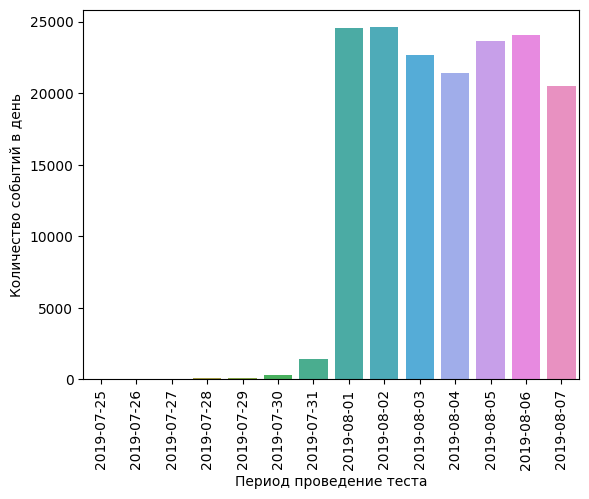

In [ ]:
ax = sns.countplot(data=df, x=df['event_day'])
ax.set_xlabel('Период проведение теста')
ax.set_ylabel('Количество событий в день')
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)

Шаг 4. Анализ воронки событий

Распределение событий: какие события и в каком количестве.
Сколько пользователей совершали каждое из этих событий?
Постройте воронку событий: какая доля пользователей проходит на следующий шаг воронки. На каком шаге теряете больше всего пользователей? Какая доля пользователей доходит от первого события до оплаты?

In [ ]:
# Распределение событий: какие события и в каком количестве
df.event_name.value_counts()

MainScreenAppear           80852
OffersScreenAppear         31904
CartScreenAppear           27870
PaymentScreenSuccessful    22206
Tutorial                     700
Name: event_name, dtype: int64

In [ ]:
#по группам
funnel_247 = df[df.grop_id == 247].groupby(['event_name'],as_index=False)\
         .agg(count_events = ('event_name', 'count'))\
         .sort_values(by='count_events', ascending=False)
funnel_248 = df[df.grop_id == 248].groupby(['event_name'],as_index=False)\
         .agg(count_events = ('event_name', 'count'))\
         .sort_values(by='count_events', ascending=False)
funnel = funnel_247.merge(funnel_248,
                                     on='event_name',
                                     suffixes=('_247', '_248')
                                     )
funnel

,event_name,count_events_247,count_events_248
0,MainScreenAppear,39677,41175
1,OffersScreenAppear,15341,16563
2,CartScreenAppear,12548,15322
3,PaymentScreenSuccessful,10039,12167
4,Tutorial,345,355


In [ ]:
# Сколько пользователей совершали каждое из этих событий?
funnel_247 = df[df.grop_id == 247].groupby(['event_name'],as_index=False)\
         .agg(count_users = ('user_id', 'nunique'))\
         .sort_values(by='count_users', ascending=False)
funnel_248 = df[df.grop_id == 248].groupby(['event_name'],as_index=False)\
         .agg(count_users = ('user_id', 'nunique'))\
         .sort_values(by='count_users', ascending=False)
funnel = funnel_247.merge(funnel_248,
                                     on='event_name',
                                     suffixes=('_247', '_248')
                                     )
funnel

,event_name,count_users_247,count_users_248
0,MainScreenAppear,2482,2501
1,OffersScreenAppear,1530,1538
2,CartScreenAppear,1240,1239
3,PaymentScreenSuccessful,1160,1185
4,Tutorial,286,282


In [ ]:
import plotly.express as px
funnel_247 = df[df.grop_id == 247].groupby(['grop_id', 'event_name'],as_index=False)\
         .agg(count_users = ('user_id', 'nunique'))\
         .sort_values(by='count_users', ascending=False)
funnel_248 = df[df.grop_id == 248].groupby(['grop_id', 'event_name'],as_index=False)\
         .agg(count_users = ('user_id', 'nunique'))\
         .sort_values(by='count_users', ascending=False)
funnel_full = pd.concat([funnel_247, funnel_248])
funnel_full = funnel_full.loc[funnel_full['event_name'] != 'Tutorial'] # сбросим 'Tutorial'
fig = px.funnel(funnel_full,
               x='count_users',
               y='event_name',
               color='grop_id'
               )
fig.show()

Постройте воронку событий: какая доля пользователей проходит на следующий шаг воронки. На каком шаге теряете больше всего пользователей? Какая доля пользователей доходит от первого события до оплаты?

In [ ]:
from plotly import graph_objects as go
funnel_247 = funnel_247.loc[funnel_247['event_name'] != 'Tutorial'] # сбросим 'Tutorial'
funnel_248 = funnel_248.loc[funnel_248['event_name'] != 'Tutorial'] # сбросим 'Tutorial'
fig = go.Figure()
fig.add_trace(go.Funnel(
     name = 'Группа 247',
    y = funnel_247['event_name'],
    x = funnel_247['count_users'],
    textinfo = "value+percent initial+percent previous"))
fig.add_trace(go.Funnel(
     name = 'Группа 248',
    y = funnel_248['event_name'],
    x = funnel_248['count_users'],
    textinfo = "value+percent initial+percent previous"))
fig.show()

На каком шаге теряете больше всего пользователей?

- на шаге OffersScreenAppear теряется около 40%

Какая доля пользователей доходит от первого события до оплаты?

- 47%

Шаг 5. Анализ результатов эксперимента

Сколько пользователей в каждой группе?
Посчитайте долю пользователей, совершивших каждое из событий.
Проверьте гипотезу о наличие значимых отличий по результатам теста.

In [ ]:
funnel

,event_name,count_users_247,count_users_248
0,MainScreenAppear,2482,2501
1,OffersScreenAppear,1530,1538
2,CartScreenAppear,1240,1239
3,PaymentScreenSuccessful,1160,1185
4,Tutorial,286,282


In [ ]:
funnel['perc_users_247'] = np.round(funnel['count_users_247'] / df[df['grop_id'] == 247].user_id.nunique(),2)
funnel['perc_users_248'] = np.round(funnel['count_users_248'] / df[df['grop_id'] == 248].user_id.nunique(),2)
funnel

,event_name,count_users_247,count_users_248,perc_users_247,perc_users_248
0,MainScreenAppear,2482,2501,0.98,0.98
1,OffersScreenAppear,1530,1538,0.61,0.61
2,CartScreenAppear,1240,1239,0.49,0.49
3,PaymentScreenSuccessful,1160,1185,0.46,0.47
4,Tutorial,286,282,0.11,0.11


Вообще отличий нет

In [ ]:
# Проверьте гипотезу о наличии значимых отличий по результатам теста.

# H0: нет статистически значимой разницы между долями пользователей из обеих групп, совершивших одно и тоже событие
# H1: имеется статистически значимая разница между долями пользователей из обеих групп, совершивших одно и тоже событие

#для биноминальных распределений
def test_z_criterion(event_name, alpha):
    import scipy.stats as st
    import math
    n1 = df[df['grop_id'] == 247].user_id.nunique()
    n2 = df[df['grop_id'] == 248].user_id.nunique()

    m1 = funnel.loc[event_name, 'count_users_247']
    m2 = funnel.loc[event_name, 'count_users_248']

    z_value = (m1/n1 - m2/n2) / math.sqrt(((m1+m2)/(n1+n2))*(1-((m1+m2)/(n1+n2)))*(1/n1+1/n2))
    distr = st.norm(0, 1)
    p_value = (1 - distr.cdf(abs(z_value))) * 2 #1-F(t)
    print('Результаты проверки гипотезы H_0 по z-критерию:')
    print('Уровень значимости alpha={:.2f}'.format(alpha))
    print('P-value: {:.2f}'.format(p_value))
    if p_value < alpha:
        print(f"""Отвергаем нулевую гипотезу: разница в долях
по событию <<{event_name}>> статистически значима.""")
    else: print(f"""Не получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<{event_name}>> статистически незначима.""")
    print('------------------------------------------------------------')

In [ ]:
funnel.index = funnel['event_name'] #перезададим индекс
list(funnel['event_name'].unique())

['MainScreenAppear',
 'OffersScreenAppear',
 'CartScreenAppear',
 'PaymentScreenSuccessful',
 'Tutorial']

In [ ]:
alpha = 0.05
for e in list(funnel['event_name'].unique()):
    test_z_criterion(e, alpha)

Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.76
Не получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<MainScreenAppear>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.88
Не получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<OffersScreenAppear>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.74
Не получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<CartScreenAppear>> статистически незначима.
------------------------------------------------------------
Результаты проверки гипотезы H_0 по z-критерию:
Уровень значимости alpha=0.05
P-value: 0.68
Не получилось отвергнуть нулевую гипотезу: разница в долях по
событию <<PaymentScreenSuccessful>> с

Выдвинутая гипотеза о том, что смена шрифтов улучшит качество обслуживания по количеству клиентов, совершающих каждое событие, на группах 247 и 248 не подтвердилась